In [1]:
from matplotlib import pyplot as plt

from cxai import factory
from cxai import utils as putils

# Introduction

In this notebook, we demonstrate the functionality of LRP on explaining predictions from NFNet-F0.
We produce the explanations from the images used in *Fig. D.2 in Supplementary Note D*.

For the sake of comparison, the demonstration starts with explaining VGG16 with LRP.

In [2]:
images = [
    ("../tests/data/volcano.jpg", 980),
    ("../tests/data/zebra.jpg", 340),
    ("../tests/data/castle.jpg", 483),
    ("../tests/data/castle.jpg", 919),
    ("../tests/data/viaduct.jpg", 888),
]

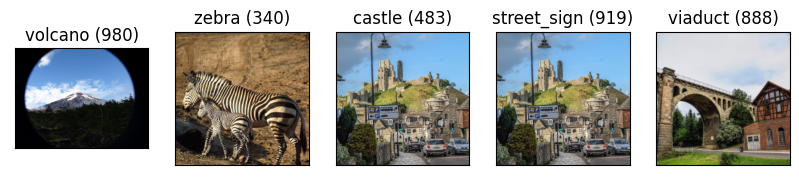

In [3]:
def viz_images():
    
    size = 2
    
    ncols = len(images)
    
    plt.figure(figsize=(size*ncols, size))
    
    for i, (filename, label) in enumerate(images):
        
        plt.subplot(1, ncols, i+1)
        
        img = putils.load_image(filename)
        putils.viz.imshow(img)
        
        class_desc = putils.imagenet.get_desc_from_label_id(label)
        plt.title(f"{class_desc} ({label})")
viz_images()

/home/pat/projects/drsa-demo/venv/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


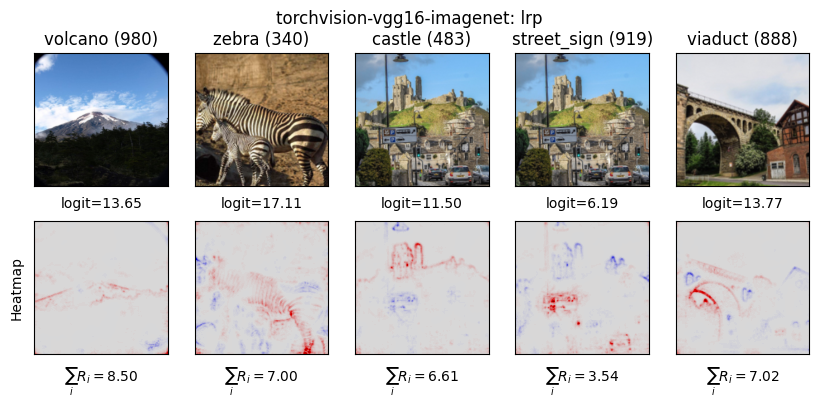

In [4]:
def viz_heatmaps(arch, attr_method):
    
    # load model and transformations (cropping and cropping + to_tensor)
    model, (rc_transform, input_transform) = factory.make_model(arch)
    
    
    # instantiate LRP explainer with the model
    explainer = factory.make_explainer(attr_method, model)
    
    size = 2
    
    nrows, ncols = 2, len(images)
    
    plt.figure(figsize=(size*ncols, size*nrows))
    
    for i, (filename, label) in enumerate(images):
        class_desc = putils.imagenet.get_desc_from_label_id(label)
        
        img = putils.load_image(filename)
        
        # this is the version of the image that the model sees.
        cropped_img = rc_transform(img)
        
        # produce explanation w.r.t.  the given label
        logits, heatmap = explainer.explain(
            input_transform(img),
            label
        )
        
        plt.subplot(nrows, ncols, i+1)
        
        putils.viz.imshow(cropped_img)
        plt.title(f"{class_desc} ({label})")
        
        label_logit = logits[label]
        plt.xlabel(f"logit={label_logit:.2f}")

        
        plt.subplot(nrows, ncols, ncols+i+1)
        
        # sum relevances over channels
        heatmap = heatmap.sum(axis=0)
        putils.viz.heatmap(heatmap)
        
        if i == 0:
            plt.ylabel(f"Heatmap")

    plt.suptitle(f"{arch}: {attr_method}", fontsize="large")
viz_heatmaps("torchvision-vgg16-imagenet", "lrp")

/home/pat/projects/drsa-demo/venv/lib/python3.9/site-packages/torchvision/transforms/transforms.py:280: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


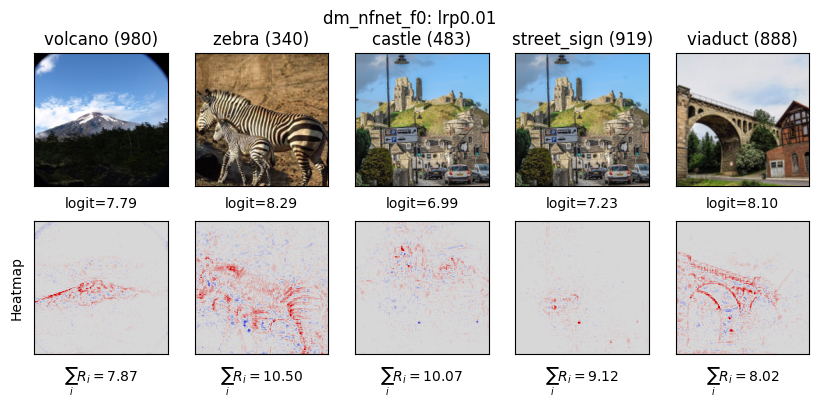

In [5]:
viz_heatmaps("dm_nfnet_f0", "lrp0.01")

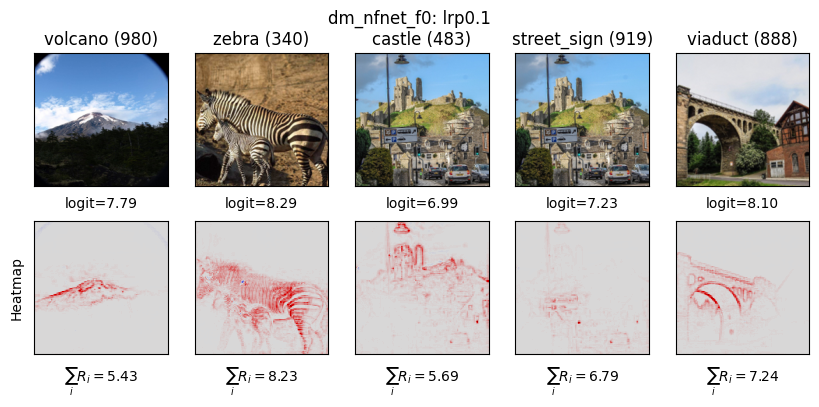

In [6]:
viz_heatmaps("dm_nfnet_f0", "lrp0.1")